# Anomaly Detection with Isolation Forest
**Dataset:** Breast Cancer Wisconsin (Binary Classification)

## Step 1: Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

sns.set(style='whitegrid')

## Step 2: Load the Dataset

In [2]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")
X['target'] = y
X.shape

(569, 31)

## Step 3: Exploratory Data Analysis (EDA)

### 3.1: Dataset Overview

In [3]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### 3.2: Summary Statistics

In [4]:
X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


### 3.3: Check for Missing Values

In [5]:
X.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


### 3.4: Class Distribution

<ipython-input-6-d2f1ffb9ad09>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=X, palette='Set2')


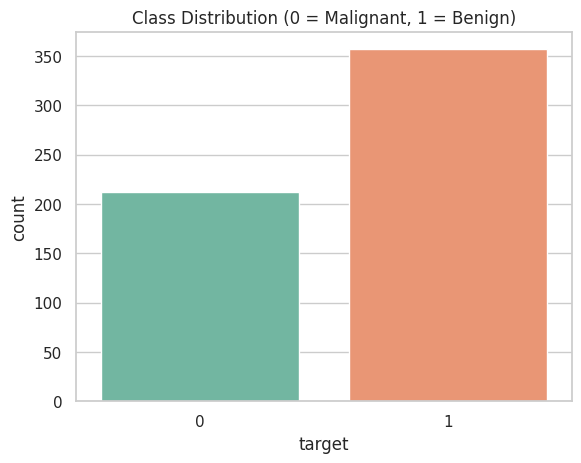

In [6]:
sns.countplot(x='target', data=X, palette='Set2')
plt.title("Class Distribution (0 = Malignant, 1 = Benign)")
plt.show()

### 3.5: Feature Correlation

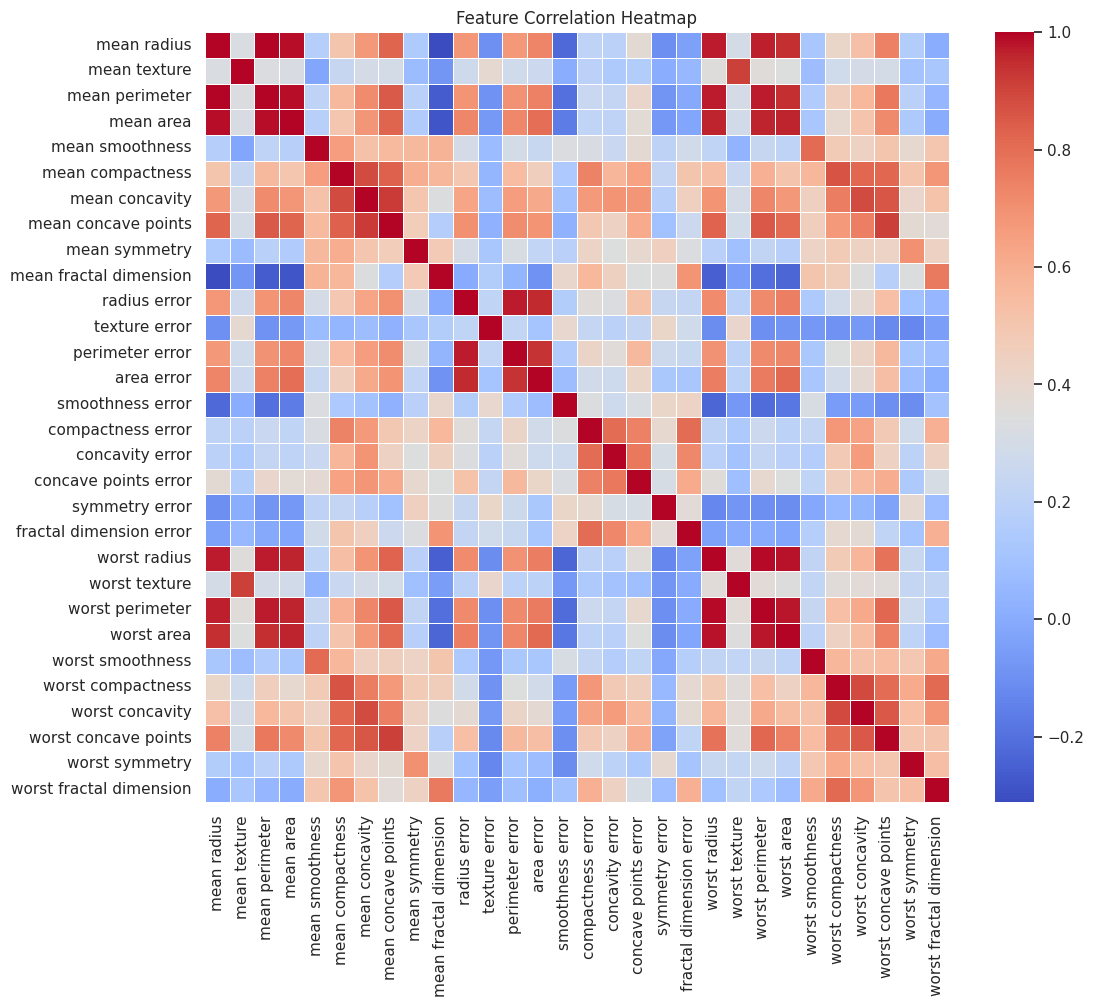

In [7]:
plt.figure(figsize=(12, 10))
sns.heatmap(X.drop(columns='target').corr(), cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

## Step 4: Prepare Data for Isolation Forest

In [8]:
X_features = X.drop(columns='target')
y_labels = X['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features)

## Step 5: Train Isolation Forest and Detect Anomalies

In [9]:
# Train Isolation Forest
isf = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
isf.fit(X_scaled)

# Predict anomalies (-1 = anomaly, 1 = normal)
anomaly_pred = isf.predict(X_scaled)
anomaly_scores = isf.decision_function(X_scaled)

## Step 6: Add Predictions to Dataset

In [10]:
# Convert predictions for labeling
anomaly_df = pd.DataFrame(X_scaled, columns=X_features.columns)
anomaly_df['anomaly'] = anomaly_pred
anomaly_df['score'] = anomaly_scores
anomaly_df['true_label'] = y_labels.values

# Map labels for clarity
anomaly_df['anomaly'] = anomaly_df['anomaly'].map({1: 'Inlier', -1: 'Outlier'})
anomaly_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,anomaly,score,true_label
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,Outlier,-0.026776,0
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,Inlier,0.098658,0
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,Inlier,0.096502,0
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,Outlier,-0.098832,0
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,Inlier,0.090183,0


## Step 7: Visualize Anomaly Score Distribution

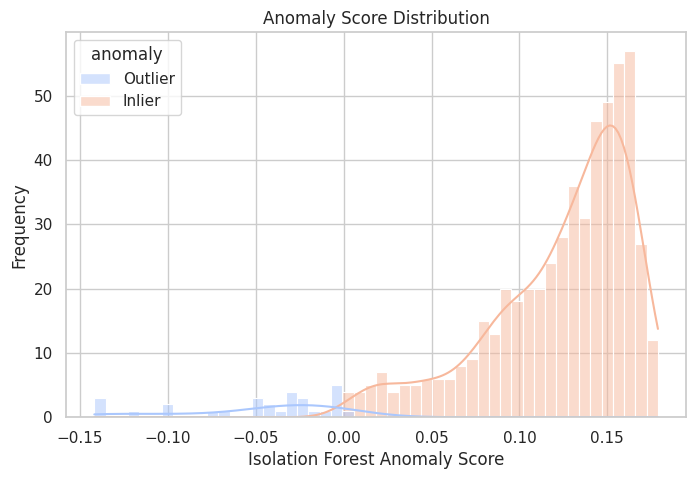

In [11]:
plt.figure(figsize=(8, 5))
sns.histplot(data=anomaly_df, x='score', hue='anomaly', bins=50, palette='coolwarm', kde=True)
plt.title("Anomaly Score Distribution")
plt.xlabel("Isolation Forest Anomaly Score")
plt.ylabel("Frequency")
plt.show()

## Step 8: Scatter Plot of Two Key Features

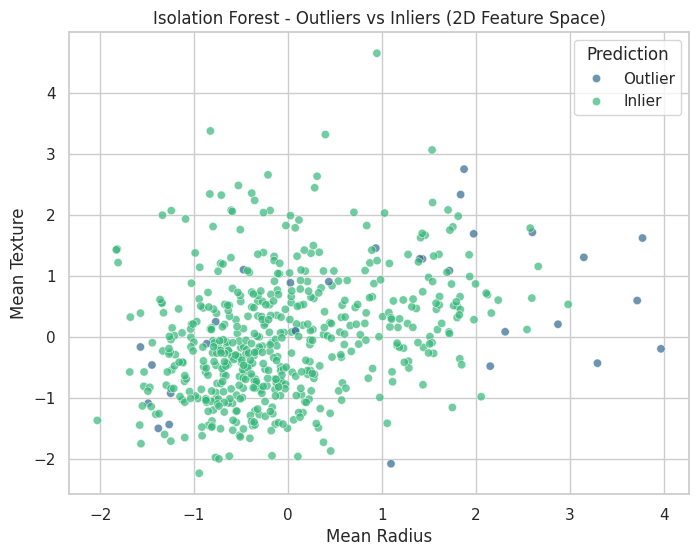

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=anomaly_df['mean radius'],
    y=anomaly_df['mean texture'],
    hue=anomaly_df['anomaly'],
    palette='viridis',
    alpha=0.7
)
plt.title("Isolation Forest - Outliers vs Inliers (2D Feature Space)")
plt.xlabel("Mean Radius")
plt.ylabel("Mean Texture")
plt.legend(title="Prediction")
plt.show()